In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
!pip install opendatasets --upgrade --quiet


In [4]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/grassknoted/asl-alphabet'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  krantiditya


Your Kaggle Key:

  ································


100%|██████████| 1.03G/1.03G [00:08<00:00, 131MB/s] 


In [5]:
# Look into the data directory
data_dir = './asl-alphabet'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/asl_alphabet_train" + "/asl_alphabet_train")
print(classes)

['asl_alphabet_test', 'asl_alphabet_train']
['G', 'W', 'B', 'U', 'M', 'D', 'X', 'E', 'space', 'O', 'I', 'F', 'nothing', 'K', 'C', 'del', 'A', 'J', 'Z', 'T', 'R', 'H', 'Y', 'L', 'S', 'V', 'N', 'P', 'Q']


In [6]:
A_files = os.listdir(data_dir + "/asl_alphabet_train" + "/asl_alphabet_train/A")
print('No. of training examples for A:', len(A_files))
print(A_files[:5])

No. of training examples for A: 3000
['A1191.jpg', 'A2583.jpg', 'A2168.jpg', 'A502.jpg', 'A1797.jpg']


In [7]:
K_files = os.listdir(data_dir + "/asl_alphabet_train" + "/asl_alphabet_train/K")
print('No. of training examples for K:', len(K_files))
print(K_files[:5])

No. of training examples for K: 3000
['K1026.jpg', 'K513.jpg', 'K1164.jpg', 'K2898.jpg', 'K2579.jpg']


In [8]:
test_files = os.listdir(data_dir + "/asl_alphabet_test" + "/asl_alphabet_test")
print("No. of test examples for ship:", len(test_files))
print(test_files)

No. of test examples for ship: 28
['Y_test.jpg', 'nothing_test.jpg', 'O_test.jpg', 'J_test.jpg', 'B_test.jpg', 'H_test.jpg', 'C_test.jpg', 'W_test.jpg', 'U_test.jpg', 'space_test.jpg', 'N_test.jpg', 'P_test.jpg', 'X_test.jpg', 'K_test.jpg', 'Z_test.jpg', 'G_test.jpg', 'T_test.jpg', 'F_test.jpg', 'L_test.jpg', 'R_test.jpg', 'M_test.jpg', 'Q_test.jpg', 'A_test.jpg', 'D_test.jpg', 'I_test.jpg', 'S_test.jpg', 'E_test.jpg', 'V_test.jpg']


In [9]:
dataset_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [10]:
dataset = ImageFolder(data_dir+"/asl_alphabet_train" + "/asl_alphabet_train", transform=dataset_transforms)

In [11]:
len(dataset)

87000

In [12]:
dataset

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ./asl-alphabet/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [13]:
print(dataset[0])

(tensor([[[0.0000, 0.0118, 0.0392,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0275, 0.0706,  ..., 0.0784, 0.0196, 0.0000],
         [0.0000, 0.0510, 0.1686,  ..., 0.7569, 0.6902, 0.0196],
         ...,
         [0.0157, 0.0196, 0.5176,  ..., 0.5922, 0.5569, 0.0471],
         [0.0000, 0.0275, 0.4824,  ..., 0.5529, 0.4863, 0.0431],
         [0.0000, 0.0000, 0.0157,  ..., 0.0588, 0.0471, 0.0000]],

        [[0.0157, 0.0000, 0.0000,  ..., 0.0000, 0.0196, 0.0157],
         [0.0039, 0.0000, 0.0235,  ..., 0.0235, 0.0078, 0.0431],
         [0.0000, 0.0314, 0.1333,  ..., 0.6902, 0.6549, 0.0118],
         ...,
         [0.0118, 0.0118, 0.5412,  ..., 0.5216, 0.4980, 0.0157],
         [0.0000, 0.0314, 0.4941,  ..., 0.5020, 0.4510, 0.0392],
         [0.0118, 0.0196, 0.0235,  ..., 0.0196, 0.0392, 0.0196]],

        [[0.9922, 0.9922, 1.0000,  ..., 0.9922, 1.0000, 0.9843],
         [0.9961, 0.8941, 0.7843,  ..., 0.7451, 0.8039, 0.9412],
         [0.9882, 0.7765, 0.4824,  ..., 0.8627, 1.0000, 0

In [14]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 200, 200]) 0


tensor([[[0.0000, 0.0118, 0.0392,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0275, 0.0706,  ..., 0.0784, 0.0196, 0.0000],
         [0.0000, 0.0510, 0.1686,  ..., 0.7569, 0.6902, 0.0196],
         ...,
         [0.0157, 0.0196, 0.5176,  ..., 0.5922, 0.5569, 0.0471],
         [0.0000, 0.0275, 0.4824,  ..., 0.5529, 0.4863, 0.0431],
         [0.0000, 0.0000, 0.0157,  ..., 0.0588, 0.0471, 0.0000]],

        [[0.0157, 0.0000, 0.0000,  ..., 0.0000, 0.0196, 0.0157],
         [0.0039, 0.0000, 0.0235,  ..., 0.0235, 0.0078, 0.0431],
         [0.0000, 0.0314, 0.1333,  ..., 0.6902, 0.6549, 0.0118],
         ...,
         [0.0118, 0.0118, 0.5412,  ..., 0.5216, 0.4980, 0.0157],
         [0.0000, 0.0314, 0.4941,  ..., 0.5020, 0.4510, 0.0392],
         [0.0118, 0.0196, 0.0235,  ..., 0.0196, 0.0392, 0.0196]],

        [[0.9922, 0.9922, 1.0000,  ..., 0.9922, 1.0000, 0.9843],
         [0.9961, 0.8941, 0.7843,  ..., 0.7451, 0.8039, 0.9412],
         [0.9882, 0.7765, 0.4824,  ..., 0.8627, 1.0000, 0.

In [15]:
print(dataset.classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [17]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  A (0)


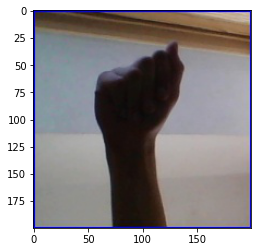

In [18]:
show_example(*dataset[0])

Label:  D (3)


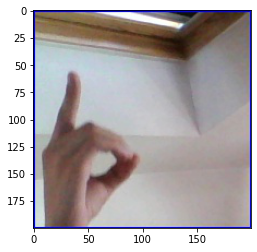

In [19]:
show_example(*dataset[9099])

Label:  H (7)


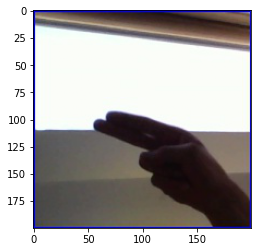

In [20]:
show_example(*dataset[23099])

# Train val

In [21]:
random_seed = 42
torch.manual_seed(random_seed);

In [22]:
len(dataset)


87000

In [23]:
val_size = len(dataset)//5         # 20% validation data
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(69600, 17400)

In [24]:
batch_size=64

In [25]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [26]:
from torchvision.utils import make_grid

def show_batch(dl, nmax=64):
    for images, labels in dl:
        print(images.shape)
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:nmax], nrow=8).permute(1, 2, 0))
        break

torch.Size([64, 3, 200, 200])


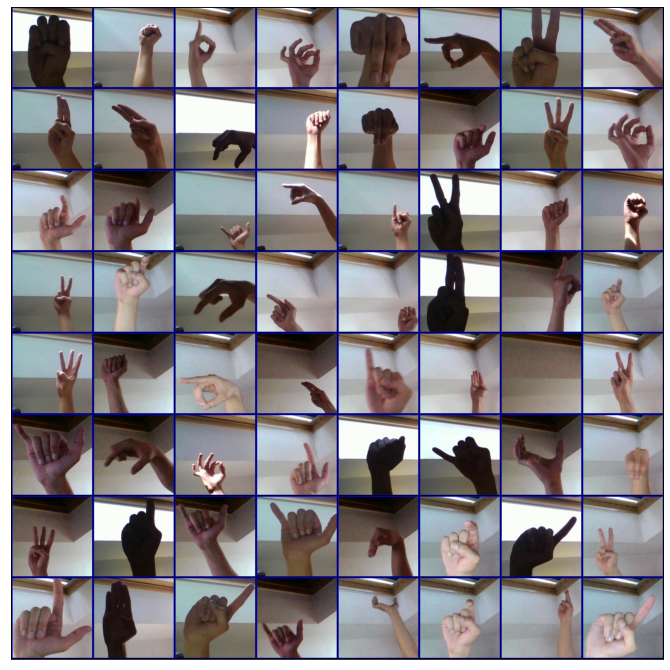

In [27]:
show_batch(train_dl)

# using gpu

In [28]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [29]:
device = get_default_device()
device

device(type='cuda')

In [30]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

# Model with Residual Blocks and Batch Normalization

In [31]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [32]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([64, 3, 200, 200])


In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [38]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(18432, 2048),
                                        nn.ReLU(),
                                        nn.Linear(2048, 512),
                                        nn.ReLU(),
                                        nn.Linear(512, num_classes)
                                        )
        
    def forward(self, xb):
#         print(xb.shape)
        out = self.conv1(xb)
#         print(out.shape)
        out = self.conv2(out)
#         print(out.shape)
        out = self.res1(out) + out
#         print(out.shape)
        out = self.conv3(out)
#         print(out.shape)
        out = self.conv4(out)
#         print(out.shape)
        out = self.res2(out) + out
#         print(out.shape)
        out = self.classifier(out)
#         print(out.shape)
        return out

In [39]:
model = to_device(ResNet9(3, 29), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Training the model

In [40]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [41]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 3.367490530014038, 'val_acc': 0.03161381557583809}]

In [42]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [43]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00395, train_loss: 1.5005, val_loss: 0.8419, val_acc: 0.7438
Epoch [1], last_lr: 0.00936, train_loss: 0.4061, val_loss: 1.0729, val_acc: 0.7183
Epoch [2], last_lr: 0.00972, train_loss: 0.2831, val_loss: 0.1237, val_acc: 0.9590
Epoch [3], last_lr: 0.00812, train_loss: 0.1819, val_loss: 0.1153, val_acc: 0.9608
Epoch [4], last_lr: 0.00556, train_loss: 0.1109, val_loss: 0.0837, val_acc: 0.9711
Epoch [5], last_lr: 0.00283, train_loss: 0.0522, val_loss: 0.0994, val_acc: 0.9691
Epoch [6], last_lr: 0.00077, train_loss: 0.0146, val_loss: 0.0009, val_acc: 1.0000
Epoch [7], last_lr: 0.00000, train_loss: 0.0042, val_loss: 0.0005, val_acc: 0.9998
CPU times: user 1h 2min 20s, sys: 38min 35s, total: 1h 40min 56s
Wall time: 1h 41min 55s


In [ ]:
train_time='4:24'

In [44]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

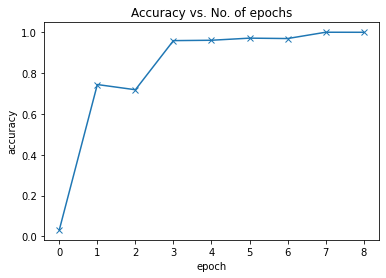

In [45]:
plot_accuracies(history)

In [46]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

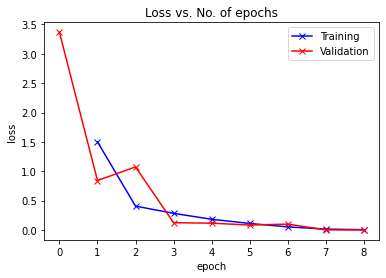

In [47]:
plot_losses(history)

In [48]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

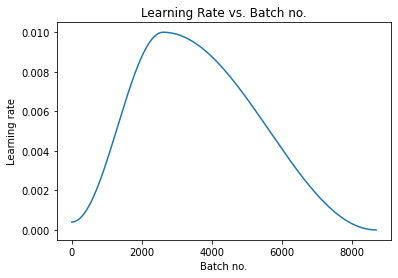

In [49]:
plot_lrs(history)

# Testing with individual images

In [79]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

In [54]:
test_files[0]

'Y_test.jpg'

In [55]:
def extract_label(file):
    return file.split('_')[0]

In [91]:
extract_label(test_files[0])

'Y'

In [111]:
test_dataset = ImageFolder('./asl-alphabet/asl_alphabet_test/asl_alphabet_test', transform=ToTensor())

FileNotFoundError: Couldn't find any class folder in ./asl-alphabet/asl_alphabet_test/asl_alphabet_test.

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([200, 200, 3])


RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[1, 200, 200, 3] to have 3 channels, but got 200 channels instead

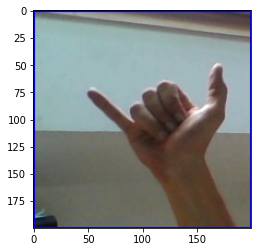

In [107]:
import matplotlib.image as mpimg
img = test_files[0]
img = mpimg.imread('./asl-alphabet/asl_alphabet_test/asl_alphabet_test/'+img)
plt.imshow(img)
print(type(img))
img = torch.from_numpy(img)
print(type(img))
print(img.shape)
# plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
# print(img.shape)
print('Label:', extract_label(test_files[0]), ', Predicted:', predict_image(img, model))

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), 'cifar10-resnet9.pth')